In [1]:
from saasbo import run_saasbo
import math
import jax.numpy as jnp
import numpy as np

/home/dev/miniconda3/envs/pyro/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lb = np.hstack((-5 * np.ones(50), 0 * np.ones(50)))   # lower bounds for input domain
ub = np.hstack((10 * np.ones(50), 30 * np.ones(50)))  # upper bounds for input domain

def branin100(x):
    assert (x <= ub).all() and (x >= lb).all()
    x1, x2 = x[19], x[64]  # Only dimensions 19 and 64 affect the value of the function
    t1 = x2 - 5.1 / (4 * math.pi ** 2) * x1 ** 2 + 5 / math.pi * x1 - 6
    t2 = 10 * (1 - 1 / (8 * math.pi)) * np.cos(x1)
    return t1 ** 2 + t2 + 10

def branin100_with_constraints(x):
    assert (x <= ub).all() and (x >= lb).all()
    cv = x[(x > 3)]
    cv_mean = np.mean(cv)
    print("cv-mean=", cv_mean)
    if cv_mean > 12.5:
        return 1e5
    
    # x1, x2, x3 = x[19], x[64], x[70]  # Only dimensions 19 and 64 affect the value of the function
    x1 = np.mean(x[0:19])
    x2 = np.min(x[19:64])
    x3 = np.max(x[64:80])
    t1 = x2 - 5.1 / (4 * math.pi ** 2) * x1 ** 2 + 5 / math.pi * x1 - 6
    t2 = 10 * (1 - 1 / (8 * math.pi)) * np.cos(x1) + np.sin(x3)
    return t1 ** 2 + t2 + 10

In [4]:
X, Y = run_saasbo(
    f=branin100_with_constraints,        # function to be minimized
    lb=lb,              # lower bounds
    ub=ub,              # upper bounds
    max_evals=50,       # total evaluation budget
    num_init_evals=10,  # number of initial quasi-random Sobol points
    seed=0,             # controls the seed for the num_init_evals random points
    alpha=0.1,          # controls sparsity in the SAAS prior
    num_warmup=512,     # number of warmup samples used in HMC
    num_samples=256,    # number of post-warmup samples used in HMC
    thinning=16,        # whether to thin the post-warmup samples by some factor
    num_restarts_ei=3,  # number of restarts for EI maximization
    # kernel="rbf",       # "rbf" or "matern"
    device="cpu",       # "cpu" or "gpu"
)

cv-mean= 13.455667348183079
cv-mean= 12.380764191107387
cv-mean= 12.319757774206144
cv-mean= 13.948223418838372
cv-mean= 11.674674283513534
cv-mean= 14.06686810304082
cv-mean= 13.071465382888688
cv-mean= 15.17495747616825
cv-mean= 12.643906432980051
cv-mean= 12.220215926936362
Starting SAASBO optimization run.
First 10 queries drawn at random. Best minimum thus far: 51.493
=== Iteration 10 ===
GP fitting took 1.13 seconds
Optimizing EI took 1.99 seconds
cv-mean= 12.920283851770288
Observed function value: 100000.000, Best function value seen thus far: 51.493
=== Iteration 11 ===
GP fitting took 1.13 seconds
Optimizing EI took 5.59 seconds
cv-mean= 12.655729636571621
Observed function value: 100000.000, Best function value seen thus far: 51.493
=== Iteration 12 ===
GP fitting took 1.15 seconds
Optimizing EI took 5.58 seconds
cv-mean= 12.412742229443758
Observed function value: 52.180, Best function value seen thus far: 51.493
=== Iteration 13 ===
GP fitting took 1.34 seconds
Optimizing 

In [14]:
X[0]

array([ 7.75878201,  8.97049007,  0.44076385,  0.4682524 , -2.90081799,
        3.41053816,  1.33801921,  0.83818697, -2.19836584,  7.98370112,
        8.12727988,  9.919859  ,  7.15805503,  7.41967182,  2.78856574,
        7.9233856 , -2.35070916, -3.69457658,  3.42117264,  4.93536674,
        7.90869078, -0.4793145 ,  9.66095943, -4.407141  ,  5.56806215,
        5.4081932 , -0.87879749, -2.49512022,  8.95417505, -3.73056737,
        4.6656162 , -4.54518757,  9.59922608,  6.01988157, -1.11120918,
        2.98864051,  3.52495658, -2.69516068,  8.35240841,  0.76495093,
        6.55926128,  9.20358549,  3.98719298, -1.1384584 ,  0.42450362,
        5.91729019, -3.31347161,  2.20319675,  5.11427889,  0.84646588,
        3.36375443,  0.42041908, 14.15166518,  9.44388745, 13.16215463,
       11.74819178,  9.10851394, 12.88730924, 14.98873956, 13.40067205,
        5.55558507,  9.33678309, 12.63710786,  9.70170352, 11.12878195,
       13.44879863, 11.67491336,  9.70140012,  3.67155716,  1.16

In [7]:
X.shape

(50, 100)

In [11]:
np.mean(X, axis=1)

array([5.59863823, 4.57256067, 4.69913203, 5.0442696 , 4.62849671,
       5.26826323, 5.17508644, 4.97695589, 5.75278181, 4.38597677,
       5.17468532, 4.0737335 , 4.75071246, 5.07919991, 4.96748446,
       5.21468889, 4.9030424 , 4.9778466 , 4.6162395 , 4.75268105,
       4.60920665, 4.71319268, 4.87713307, 4.60203998, 4.8780957 ,
       5.35806891, 4.84773824, 4.43052624, 5.62063312, 5.86364236,
       3.61394902, 4.5376341 , 4.7016616 , 5.64062748, 5.28032526,
       4.28396596, 5.38091208, 4.36947333, 4.74523425, 4.99716854,
       5.29086239, 4.30541432, 4.17250155, 5.43594274, 5.16764024,
       4.42338398, 5.56122318, 5.41597107, 4.79534505, 4.8850979 ])

## Plot progress

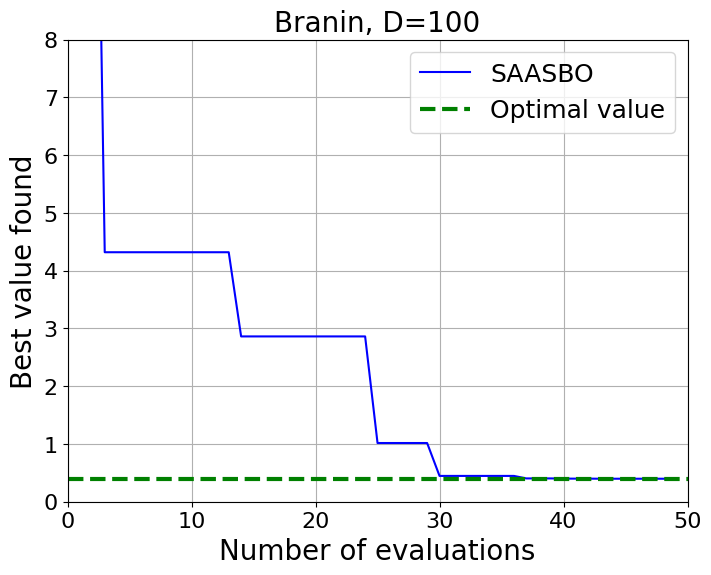

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams.update({"font.size": 16})


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.minimum.accumulate(Y), color="b", label="SAASBO")
ax.plot([0, 50], [0.398, 0.398], "--", c="g", lw=3, label="Optimal value")
ax.grid(True)
ax.set_title("Branin, D=100", fontsize=20)
ax.set_xlabel("Number of evaluations", fontsize=20)
ax.set_xlim([0, 50])
ax.set_ylabel("Best value found", fontsize=20)
ax.set_ylim([0, 8])
ax.legend(fontsize=18)
plt.show()

## Take a look at the GP fit

In [ ]:
from saasgp import SAASGP


gp = SAASGP(
    alpha=0.1,
    num_warmup=512,
    num_samples=256,
    max_tree_depth=6,
    num_chains=1,
    thinning=16,
    verbose=False,
    observation_variance=1e-6,
    kernel="rbf",
)

# Fit a GP to the normalized data
train_X = (X - lb) / (ub - lb)
train_Y = (Y - Y.mean()) / Y.std()
gp = gp.fit(train_X, train_Y)

## Print the dimensions with the smallest median lengthscales

In [ ]:
ell = 1.0 / jnp.sqrt(gp.flat_samples["kernel_inv_length_sq"][::gp.thinning])
ell_median = jnp.median(ell, 0)

for i in ell_median.argsort()[:10]:
    print(f"Parameter {i:2}) Median lengthscale = {ell_median[i]:.2e}")

Parameter 19) Median lengthscale = 2.93e-01
Parameter 64) Median lengthscale = 1.82e+00
Parameter 35) Median lengthscale = 3.01e+04
Parameter 10) Median lengthscale = 3.02e+04
Parameter 89) Median lengthscale = 3.07e+04
Parameter 87) Median lengthscale = 3.64e+04
Parameter 25) Median lengthscale = 3.88e+04
Parameter 23) Median lengthscale = 3.92e+04
Parameter 74) Median lengthscale = 3.95e+04
Parameter 39) Median lengthscale = 3.99e+04
